In [6]:
#Environment
from pathlib import Path
from imagebind import data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import textwrap
import numpy as np

In [6]:
import pickle

with open('/scratch/students/jiaxunliu/historical-map/result/segres/Bodleian Library/682bfbe2-b6a5-443d-a412-5366825967fa/anns.pickle', 'rb') as f:
    res = pickle.load(f)

res


{0: {'predicted_iou': 0.96435546875, 'stability_score': 0.951724112033844},
 1: {'predicted_iou': 0.95947265625, 'stability_score': 0.9558665156364441},
 2: {'predicted_iou': 0.953125, 'stability_score': 0.95784991979599},
 3: {'predicted_iou': 0.9482421875, 'stability_score': 0.9677579402923584},
 4: {'predicted_iou': 0.943359375, 'stability_score': 0.9577487707138062},
 5: {'predicted_iou': 0.9423828125, 'stability_score': 0.9509105682373047},
 6: {'predicted_iou': 0.939453125, 'stability_score': 0.9504397511482239},
 7: {'predicted_iou': 0.939453125, 'stability_score': 0.95073401927948},
 8: {'predicted_iou': 0.9384765625, 'stability_score': 0.9521803855895996},
 9: {'predicted_iou': 0.9365234375, 'stability_score': 0.9723320007324219},
 10: {'predicted_iou': 0.93017578125, 'stability_score': 0.9722814559936523},
 11: {'predicted_iou': 0.927734375, 'stability_score': 0.9760589599609375},
 12: {'predicted_iou': 0.92578125, 'stability_score': 0.9865771532058716},
 13: {'predicted_iou'

In [11]:
from pathlib import Path

res_dir = Path('result/segres')

# 列出第一层的内容
first_level_dirs = [p.name for p in res_dir.iterdir() if p.is_dir()]
first_level_files = [p.name for p in root_dir.iterdir() if p.is_file()]

print(f'当前路径: {root_dir}')
print(f'子文件夹: {first_level_dirs}')
print(f'文件: {first_level_files}')
print('---')



当前路径: result/segres
子文件夹: ['Bodleian Library', 'Ryhiner-Sammlung']
文件: []
---


# test for retrival
Using ImageBind to get a uniform embedding of vision and text to generate the cluster?

## generate the uniform embedding

## generate image and text path
Using function to generate image path

## Choose one photo and get the similarity

## Visulization analysing the embedding.

In [12]:
from pathlib import Path
#get image and text
res_dir = Path('result/segres')
# res_dir.exists()
# list(res_dir.glob('*.png'))
# png_files = [file.relative_to(res_dir ) for file in res_dir.rglob('*.png')]
png_files = list(res_dir.rglob('*.png'))
png_files = [file for file in png_files if file.name != 'final.png']
png_files

text_files = list(res_dir.rglob('text_res.pickle'))
text_files

predicted_files = list(res_dir.rglob('anns.pickle'))
len( predicted_files )

226

## create a relative list to link text with picture.
created dict will be store at result folder
Only one dict is ok just the picture path to text and save its attribute

In [13]:
#use dict to generate the root is the id
#!!!!changed need to modify
two_level_folder = [two_folder for two_folder in res_dir.rglob('*') if two_folder.is_dir() and two_folder.parent.parent==res_dir and two_folder.parent.name== 'Bodleian Library']
print(two_level_folder)
info_dict = {}

for folder in two_level_folder:
    #load text
    with open(folder/ 'text_res.pickle', 'rb') as f:
        text_dict = pickle.load(f)
    #load iou
    with open(folder/ 'anns.pickle', 'rb') as f:
        iou_dict = pickle.load(f)
    
    #match it with path
    for file in folder.glob('*.png'):
        if file.name == 'final.png':
            continue
        info_dict[str(file)] = {'text': text_dict[file.stem], 'iou': iou_dict[int(file.stem)]}

with open('result/info_dict.pickle', 'wb') as f:
    pickle.dump(info_dict,f)
print(info_dict)

[PosixPath('result/segres/Bodleian Library/6518733b-09c6-45ca-8054-67152a4cfa31'), PosixPath('result/segres/Bodleian Library/ec925704-e84d-4180-8214-a9737fb5d993'), PosixPath('result/segres/Bodleian Library/a6cfe6b5-e8e0-442c-a42c-a449a12c0329'), PosixPath('result/segres/Bodleian Library/cc546367-ba59-4111-b13b-5a36134caa95'), PosixPath('result/segres/Bodleian Library/2229bb6b-5fad-4e2b-81ce-ccc204773598'), PosixPath('result/segres/Bodleian Library/fdd4da82-646c-4c05-a882-9ddbb9bdf909'), PosixPath('result/segres/Bodleian Library/5ffb1ede-a1eb-4827-827d-cd90b320af28'), PosixPath('result/segres/Bodleian Library/d263e732-7291-4ce3-bce3-dc21af28c421'), PosixPath('result/segres/Bodleian Library/209ca258-70bb-4755-bfd0-1570eb48c493'), PosixPath('result/segres/Bodleian Library/8925e925-b8bf-41c0-8cfb-fab40919e94e'), PosixPath('result/segres/Bodleian Library/a4ea7279-0d6f-42b9-96bf-bb4fe7178dfb'), PosixPath('result/segres/Bodleian Library/0ac39b91-cd26-4d05-a47c-5439aef2747d'), PosixPath('resu

In [14]:
len(info_dict)

476

## Get text and picture embeddings

In [15]:
def save_pickle(obj, save_dir):
    with open(save_dir, 'wb') as f:
        pickle.dump(obj,f)

In [17]:
import pickle
from pathlib import Path
with open('result/info_dict.pickle', 'rb') as f:
    info_dict = pickle.load(f)

# print(info_dict)

res_dir = Path('result/segres/Bodleian Library')
image_paths = list(res_dir.rglob('*png'))
image_paths = [file_path for file_path in image_paths if file_path.name != 'final.png']

#text
text_list = [info_dict[str(pic_path)]['text'] for pic_path in image_paths]
# text_list


{'result/segres/Bodleian Library/6518733b-09c6-45ca-8054-67152a4cfa31/11.png': {'text': 'a close up of a green object with a black background ', 'iou': {'predicted_iou': 0.92333984375, 'stability_score': 0.9676637053489685}}, 'result/segres/Bodleian Library/6518733b-09c6-45ca-8054-67152a4cfa31/19.png': {'text': 'a close up of a statue of a person on a bench ', 'iou': {'predicted_iou': 0.88818359375, 'stability_score': 0.9545893669128418}}, 'result/segres/Bodleian Library/6518733b-09c6-45ca-8054-67152a4cfa31/9.png': {'text': 'there is a large gray triangle shaped object on a black background ', 'iou': {'predicted_iou': 0.9306640625, 'stability_score': 0.9602429270744324}}, 'result/segres/Bodleian Library/6518733b-09c6-45ca-8054-67152a4cfa31/7.png': {'text': 'a close up of a piece of paper with a black background ', 'iou': {'predicted_iou': 0.931640625, 'stability_score': 0.9584450125694275}}, 'result/segres/Bodleian Library/6518733b-09c6-45ca-8054-67152a4cfa31/13.png': {'text': 'a close

## Calculation

In [25]:

from imagebind import data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType
import numpy as np

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

text_input = np.array(["compass rose"])
cartoche_embedding = model({ModalityType.TEXT:data.load_and_transform_text(text_input, device)})
cartoche_embedding 

/scratch/students/jiaxunliu/historical-map/imagebind/models/imagebind_model.py:504: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(".checkpoi

{'text': tensor([[-0.1716, -1.7440,  0.8894,  ...,  2.4152, -0.5115,  1.0653]],
        device='cuda:0', grad_fn=<MulBackward0>)}

In [26]:
cartoche_embedding=cartoche_embedding['text']

In [24]:

from imagebind import data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType
import numpy as np

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# instantiate model
model = imagebind_model.imagebind_huge(pretrained=true)
model.eval()
model.to(device)

batch_size = 32
#shuffle
indices = np.random.permutation(len(image_paths))
image_paths = np.array(image_paths)[indices]
text_list = np.array(text_list)[indices]
image_paths_batches = np.array_split(image_paths, len(image_paths) // batch_size)
text_ls_batches = np.array_split(text_list, len(text_list) // batch_size)
#mini batch evaluate
for image_path_batch, text_ls_batch in zip(image_paths_batches, text_ls_batches):
    # Load data
    inputs = {
        ModalityType.TEXT: data.load_and_transform_text(text_ls_batch, device),
        ModalityType.VISION: data.load_and_transform_vision_data(image_path_batch, device),
        # ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device),
    }

    with torch.no_grad():
        embeddings = model(inputs)

    #save to info_dict
    for i,path in enumerate(image_path_batch):
        print(path)
        info_dict[str(path)]['image_embedding'] = embeddings[ModalityType.VISION][i]
        info_dict[str(path)]['text_embedding'] = embeddings[ModalityType.TEXT][i]

save_pickle(info_dict, 'result/info_dict_new.pickle')
print(info_dict)





# # Load data
# inputs = {
#     ModalityType.TEXT: data.load_and_transform_text(text_list[:5], device),
#     ModalityType.VISION: data.load_and_transform_vision_data(image_paths[:5], device),
#     # ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device),
# }

# with torch.no_grad():
#     embeddings = model(inputs)

# #save to info_dict
# for i,path in enumerate(image_paths):
#     print(path.name)
#     info_dict[str(path)]['image_embedding'] = embeddings[ModalityType.VISION][i]
#     info_dict[str(path)]['text_embedding'] = embeddings[ModalityType.TEXT][i]

# save_pickle(info_dict, 'result/info_dict_new.pickle')
# print(info_dict)



/scratch/students/jiaxunliu/historical-map/imagebind/models/imagebind_model.py:504: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(".checkpoi

result/segres/Bodleian Library/5ffb1ede-a1eb-4827-827d-cd90b320af28/5.png
result/segres/Bodleian Library/fdd4da82-646c-4c05-a882-9ddbb9bdf909/18.png
result/segres/Bodleian Library/a4ea7279-0d6f-42b9-96bf-bb4fe7178dfb/6.png
result/segres/Bodleian Library/0541abf1-cf68-45be-a0b3-6e2fc491b794/11.png
result/segres/Bodleian Library/7a22ccb2-ced6-455c-baa7-ad1d59fc5785/5.png
result/segres/Bodleian Library/b257e3f8-e4fa-45f0-b772-379f539bdbfe/0.png
result/segres/Bodleian Library/8925e925-b8bf-41c0-8cfb-fab40919e94e/8.png
result/segres/Bodleian Library/b257e3f8-e4fa-45f0-b772-379f539bdbfe/5.png
result/segres/Bodleian Library/7bd11877-d34e-445c-9437-3565d2a7eaa6/12.png
result/segres/Bodleian Library/9c37322c-24e9-4cbc-94f5-b38c072619de/4.png
result/segres/Bodleian Library/209ca258-70bb-4755-bfd0-1570eb48c493/5.png
result/segres/Bodleian Library/9c37322c-24e9-4cbc-94f5-b38c072619de/17.png
result/segres/Bodleian Library/209ca258-70bb-4755-bfd0-1570eb48c493/13.png
result/segres/Bodleian Library/60

Give a number to embeddings

In [26]:
with open('result/info_dict_new.pickle', 'rb') as f:
    info_dict = pickle.load(f)

i=0
for key in info_dict:
    info_dict[key]['id']=i
    i+=1

save_pickle(info_dict, 'result/info_dict_new.pickle')
info_dict

{'result/segres/Bodleian Library/6518733b-09c6-45ca-8054-67152a4cfa31/11.png': {'text': 'a close up of a green object with a black background ',
  'iou': {'predicted_iou': 0.92333984375,
   'stability_score': 0.9676637053489685},
  'image_embedding': tensor([-0.0332, -0.0064, -0.0259,  ..., -0.0440,  0.0514, -0.0448],
         device='cuda:0'),
  'text_embedding': tensor([ 2.5256, -2.0917, -0.2541,  ..., -0.4579, -1.7078,  6.7277],
         device='cuda:0'),
  'id': 0},
 'result/segres/Bodleian Library/6518733b-09c6-45ca-8054-67152a4cfa31/19.png': {'text': 'a close up of a statue of a person on a bench ',
  'iou': {'predicted_iou': 0.88818359375,
   'stability_score': 0.9545893669128418},
  'image_embedding': tensor([-0.0190, -0.0435, -0.0356,  ..., -0.0915,  0.0669, -0.0224],
         device='cuda:0'),
  'text_embedding': tensor([ 3.1258,  4.6457,  1.0398,  ...,  3.1007, -0.9371,  0.1944],
         device='cuda:0'),
  'id': 1},
 'result/segres/Bodleian Library/6518733b-09c6-45ca-8054-

## Get embedding and try to do the query

In [7]:
with open('result/info_dict_new.pickle', 'rb') as f:
    info_dict = pickle.load(f)

torch.Size([476])
tensor([[181, 170, 171, 177, 174, 387, 399, 178, 219, 188]], device='cuda:0')
now picture selected: 


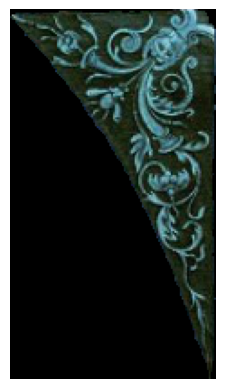

now picture text:
there is a blue and white floral design on a black background 
most similar word to images:


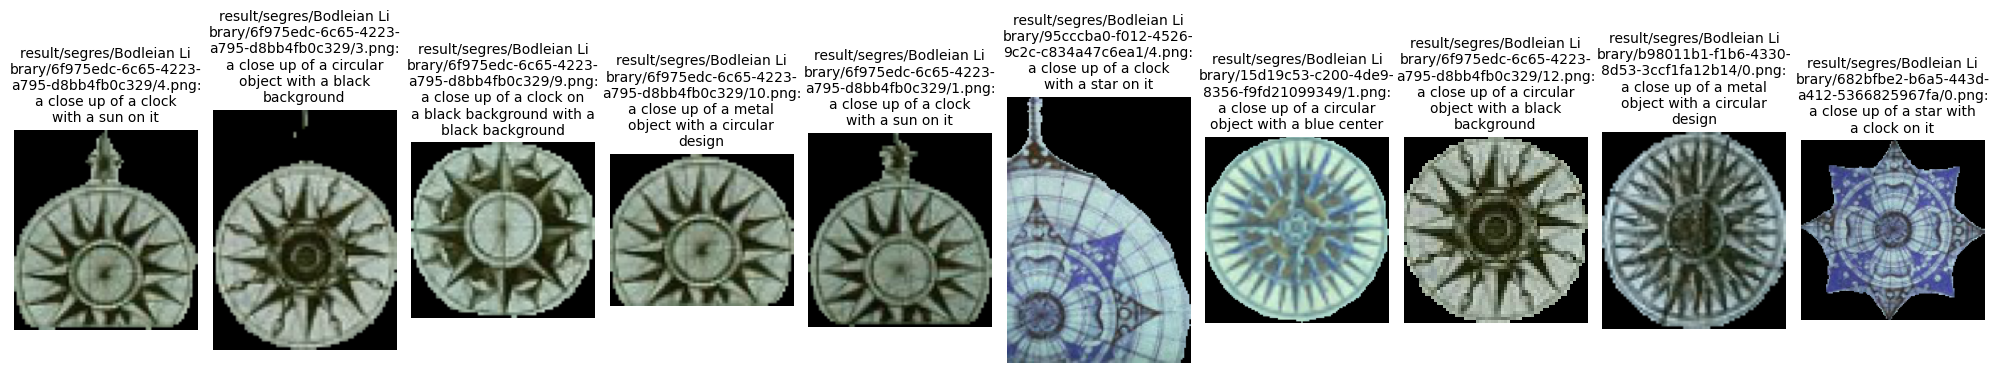

most similar image to images:


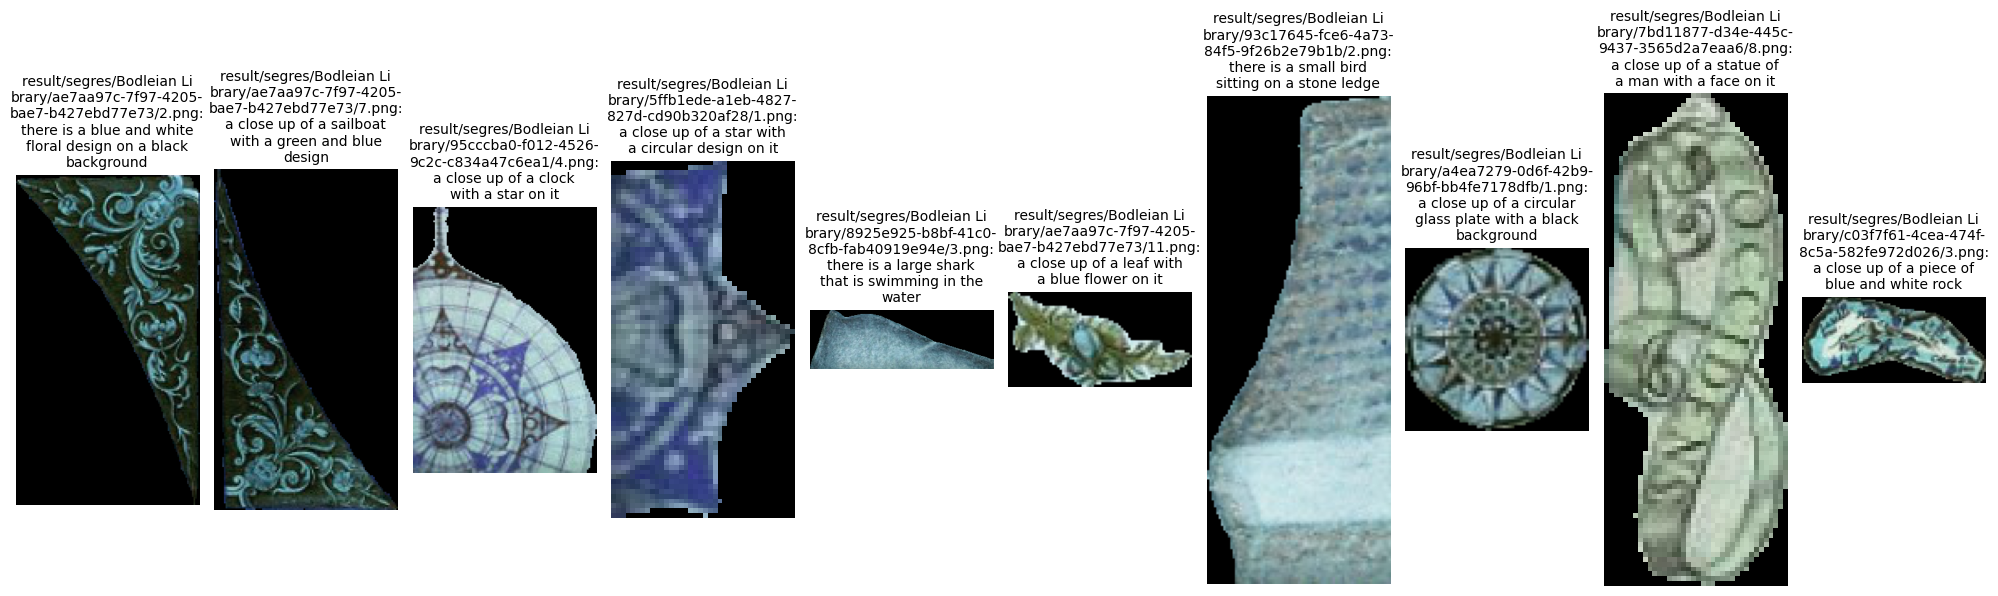

most similar image to text: 


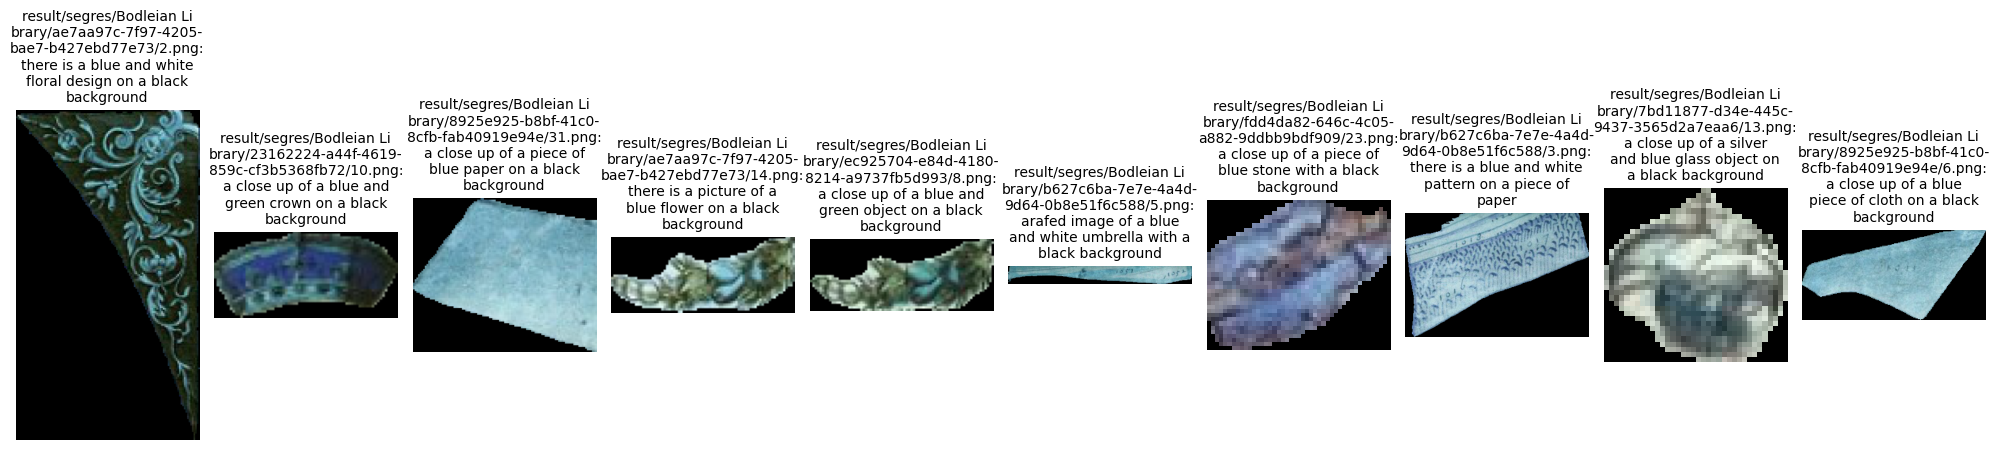

most similar text to image: 


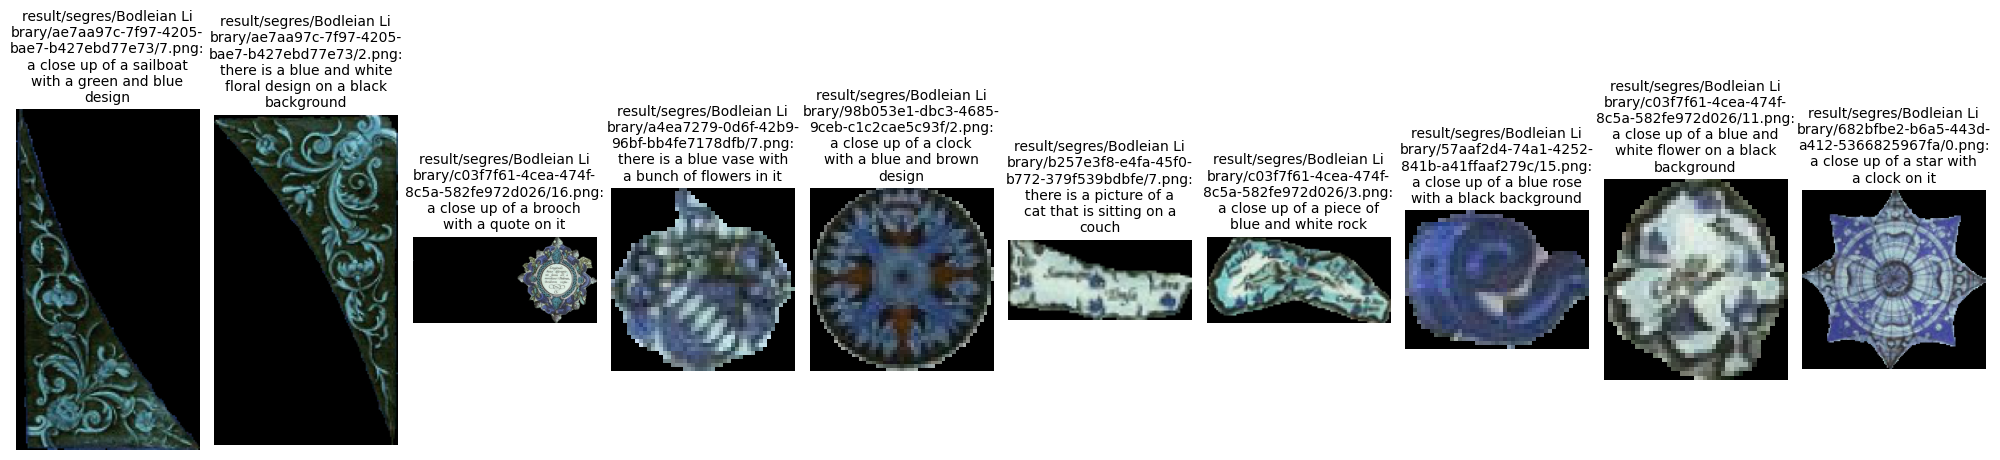

most similar text to text: 


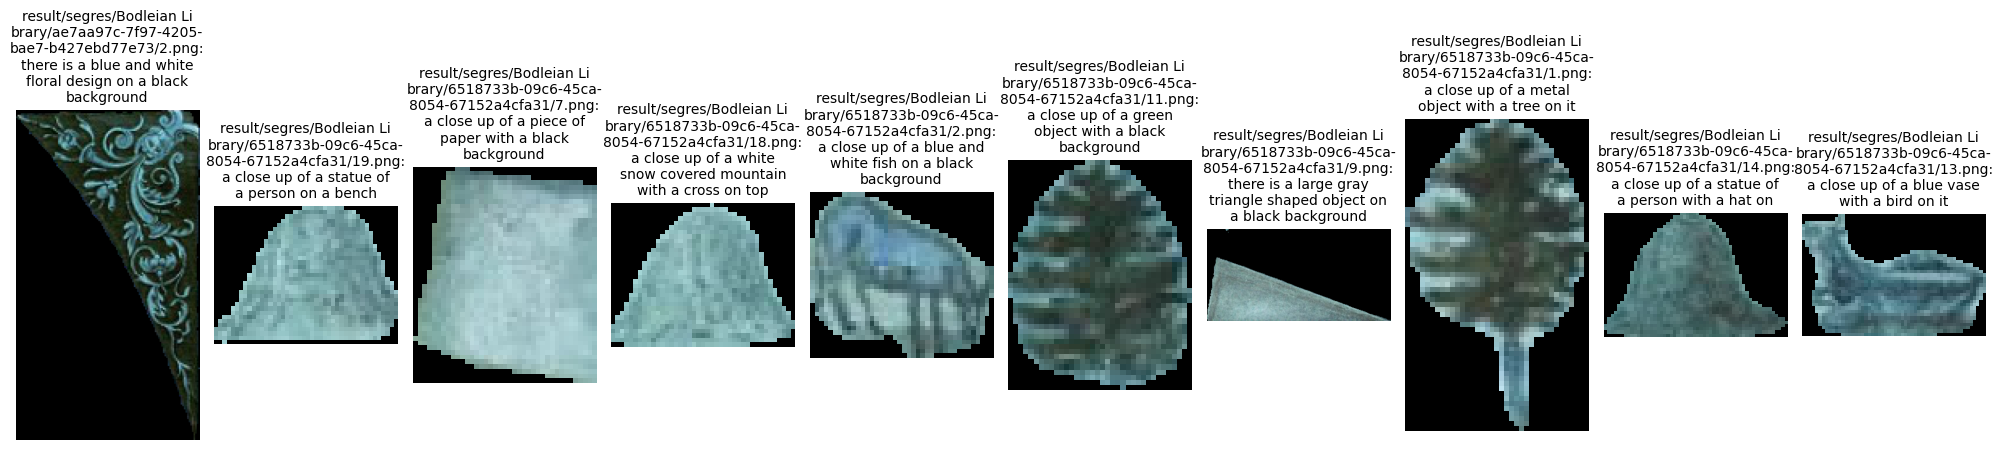

most similar text to text (using cosine): 


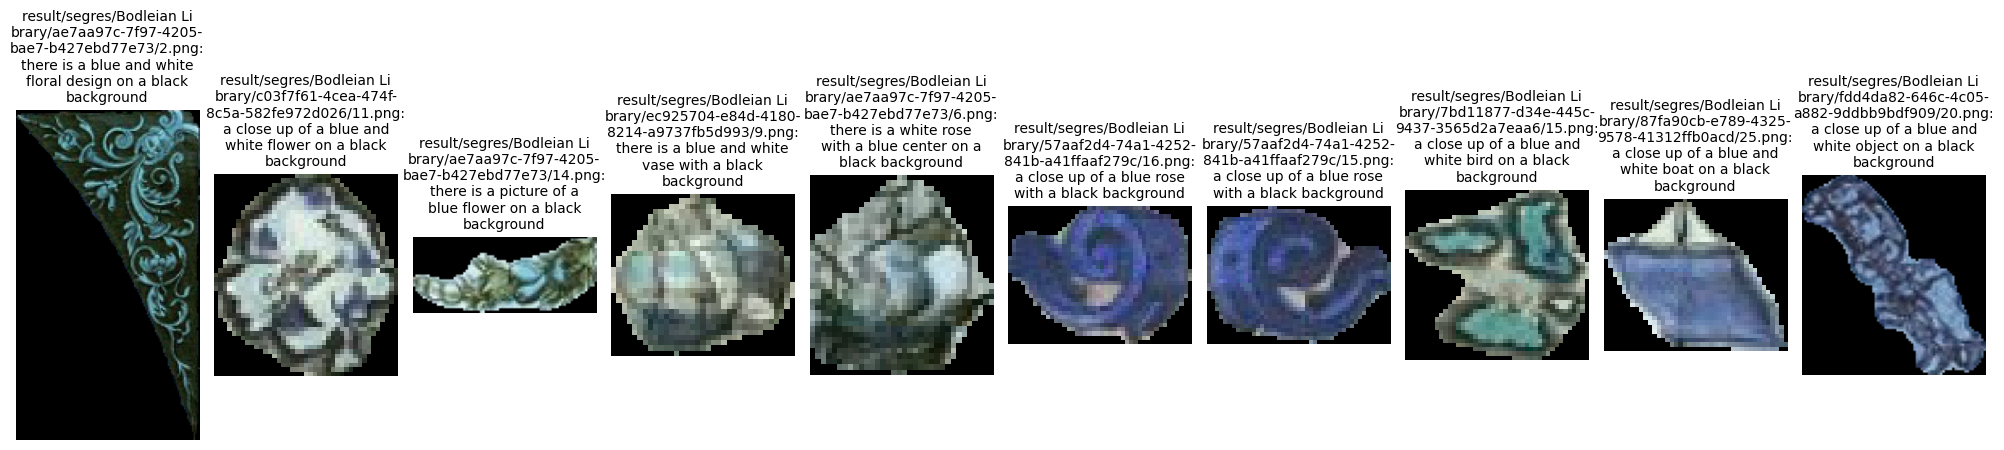

In [27]:

# select_file_path = input('Please input the file path you want to choose: ')
# select_file_path = 'result/segres/Bodleian Library/209ca258-70bb-4755-bfd0-1570eb48c493/3.png'
select_file_path = 'result/segres/Bodleian Library/ae7aa97c-7f97-4205-bae7-b427ebd77e73/2.png' 

# give a number to the embedding
id_info_dict = {info['id']: {**info, 'path':key} for key,info in info_dict.items()}
id_info_list = [id_info_dict[key] for key in sorted(id_info_dict)]
# id_info_dict

#generate the matrix
image_embeddings = torch.stack( [info['image_embedding'] for info in id_info_list])
text_embeddings = torch.stack( [info['text_embedding'] for info in id_info_list])

#calculate the similarity
similarity_image_text = torch.softmax(image_embeddings @ text_embeddings.T, dim=-1)
similarity_text_image = torch.softmax(text_embeddings @ image_embeddings.T, dim=-1)
similarity_image_image = torch.softmax(image_embeddings @ image_embeddings.T, dim=-1)
similarity_text_text = torch.softmax(text_embeddings @ text_embeddings.T, dim=-1)
similarity_word_image = torch.softmax(cartoche_embedding @ image_embeddings.T, dim=-1)
#calculate using cosine
from sklearn.metrics.pairwise import cosine_similarity
similarity_text_text_cos = cosine_similarity(text_embeddings.cpu(), text_embeddings.cpu())

print(similarity_image_image[0].shape)

indice_selected_file = info_dict[select_file_path]['id']
mask_indices = torch.ones(similarity_image_image.size(0), dtype=torch.bool)
mask_indices[indice_selected_file] = False
k=10
_, top_indices_image_text = torch.topk(similarity_image_text[indice_selected_file], 10)
_, top_indices_text_image = torch.topk(similarity_text_image[indice_selected_file], 10)
_, top_indices_image_image = torch.topk(similarity_image_image[indice_selected_file], 10)
_, top_indices_text_text = torch.topk(similarity_text_text[indice_selected_file], 10)
_, top_indices_text_text_cos = torch.topk(torch.tensor(similarity_text_text_cos[indice_selected_file]), 10)
# print(similarity_image_image[indice_selected_file])
_, top_indices_word_image = torch.topk(similarity_word_image, 10)
print(top_indices_word_image)

# print(top_indices_image_image)


#print results
print('now picture selected: ')
img = mpimg.imread(select_file_path)
plt.imshow(img)
plt.axis('off')
plt.show()

print('now picture text:')
print(id_info_dict[indice_selected_file]['text'])


def print_result(img_paths):
    # 创建一个 1 行 10 列的图形布局
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))  # 设置合适的宽高

    # 逐个读取图片并显示
    for i, img_path in enumerate(img_paths):
        img = mpimg.imread(img_path)  # 读取图片
        axes[i].imshow(img)           # 显示图片
        #similar image text
        # 使用 textwrap.wrap 将文字分行
        wrapped_caption = "\n".join(textwrap.wrap(f"{str(img_path)}: {info_dict[img_path]['text']}", 25))

        # 设置标题，限制字体大小
        axes[i].set_title(wrapped_caption, fontsize=10)  # 设置小字体大小
        axes[i].axis('off')           # 关闭坐标轴

    plt.tight_layout()
    plt.show()



#get most similar text
print('most similar word to images:')
image_paths_word_image = [info['path'] for info in np.array(id_info_list)[top_indices_word_image[0].cpu().numpy()]]
print_result(image_paths_word_image)

print('most similar image to images:')
image_paths_image_image = [info['path'] for info in np.array(id_info_list)[top_indices_image_image.cpu().numpy()]]
print_result(image_paths_image_image)

print('most similar image to text: ')
image_paths_image_text = [info['path'] for info in np.array(id_info_list)[top_indices_image_text.cpu().numpy()]]
print_result(image_paths_image_text)

print('most similar text to image: ')
image_paths_image_text = [info['path'] for info in np.array(id_info_list)[top_indices_text_image.cpu().numpy()]]
print_result(image_paths_image_text)

print('most similar text to text: ')
image_paths_image_text = [info['path'] for info in np.array(id_info_list)[top_indices_text_text.cpu().numpy()]]
print_result(image_paths_image_text)



#using cosine
# #this one is a little bit useless
print('most similar text to text (using cosine): ')
image_paths_image_text = [info['path'] for info in np.array(id_info_list)[top_indices_text_text_cos.cpu().numpy()]]
print_result(image_paths_image_text)

torch.Size([476])
now picture selected: 


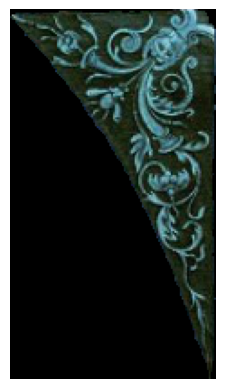

now picture text:
there is a blue and white floral design on a black background 
most similar image to images:


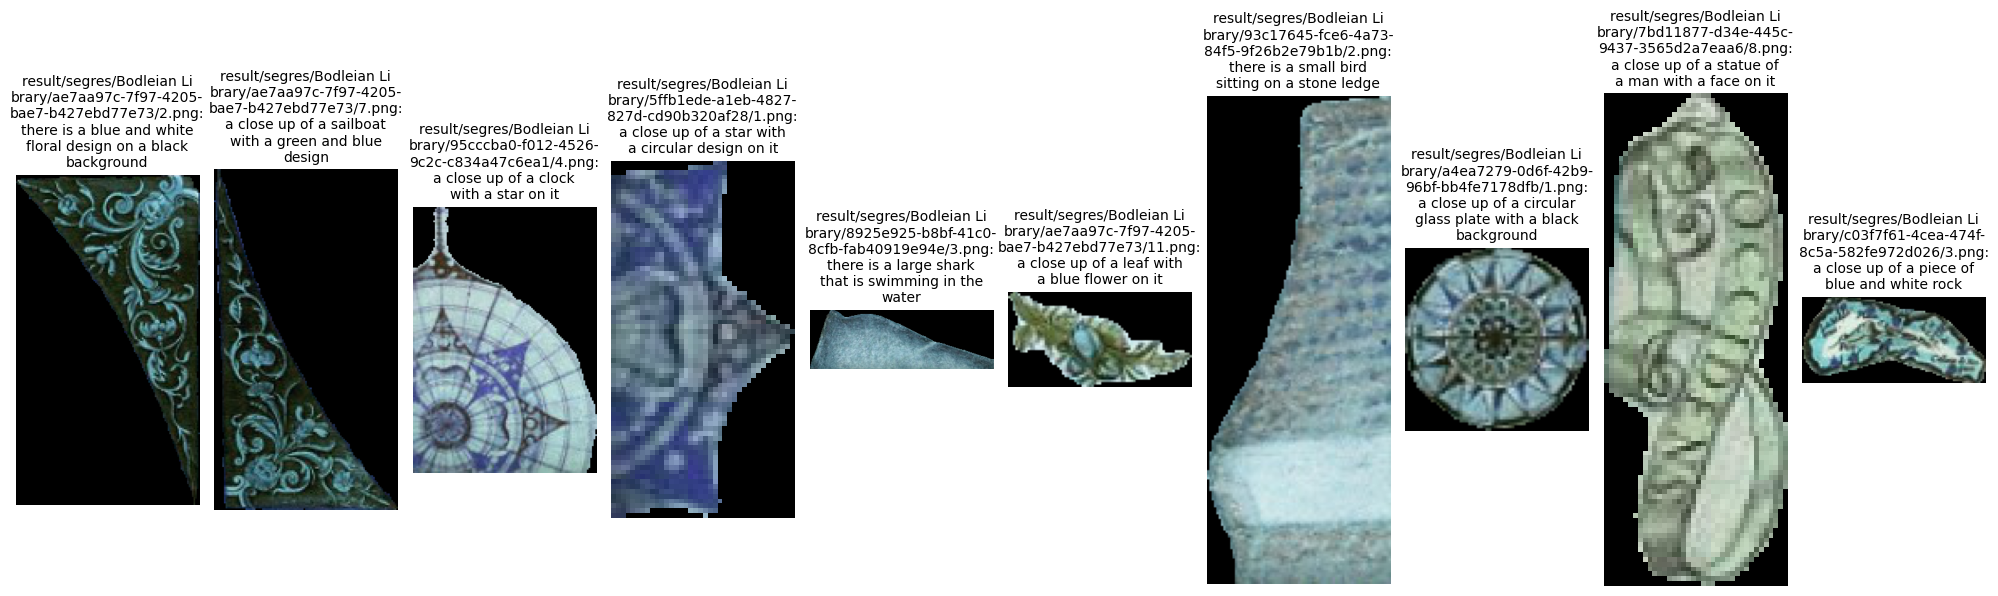

most similar image to text: 


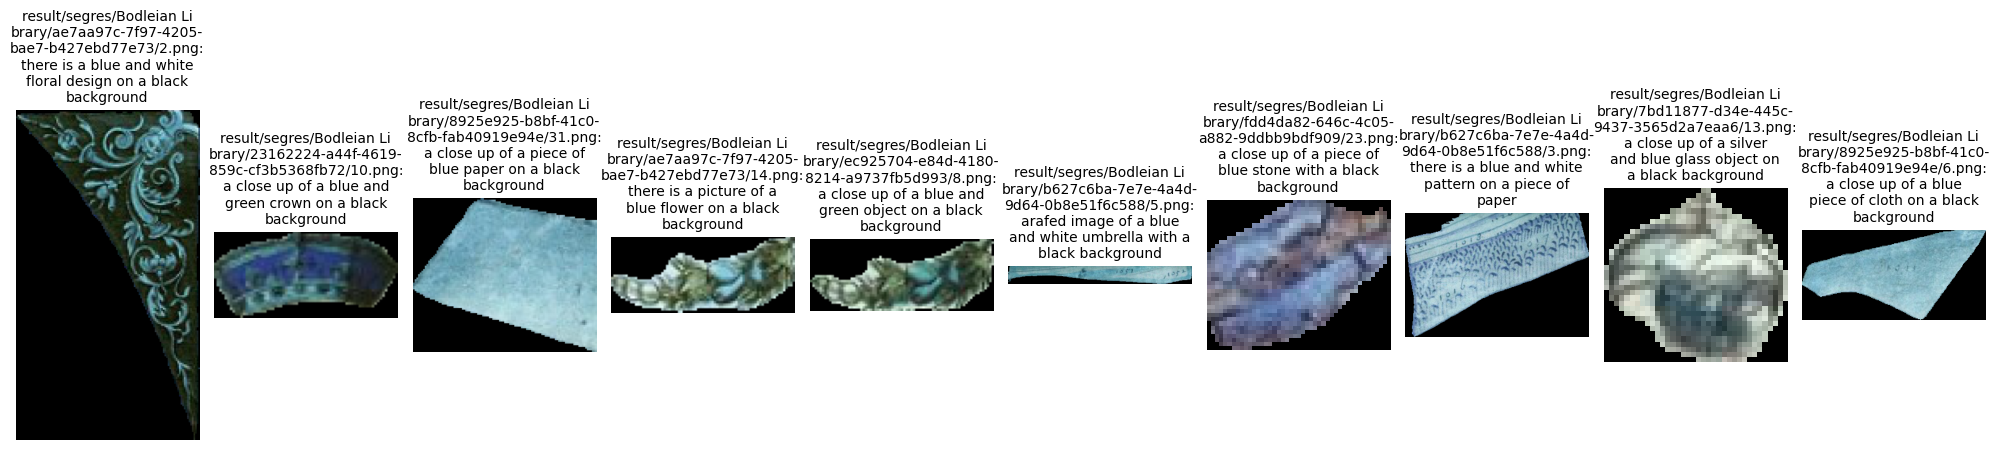

most similar text to image: 


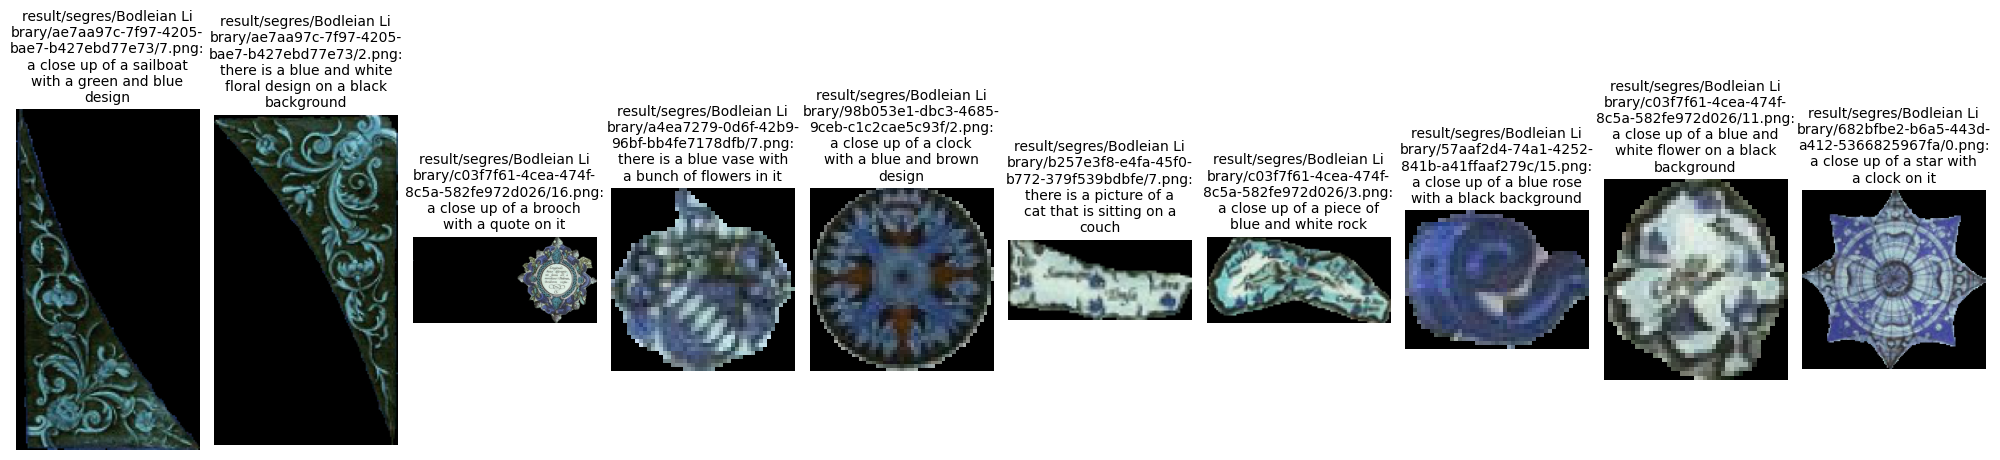

most similar text to text: 


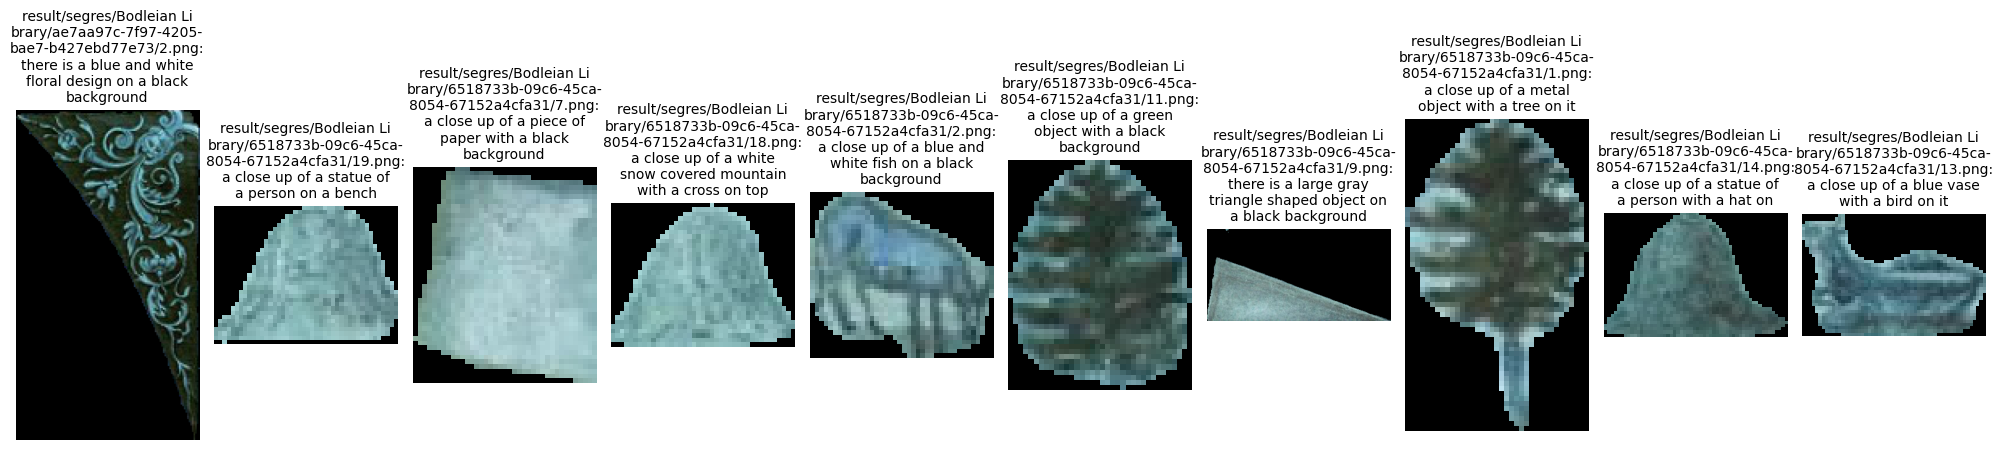

most similar text to text (using cosine): 


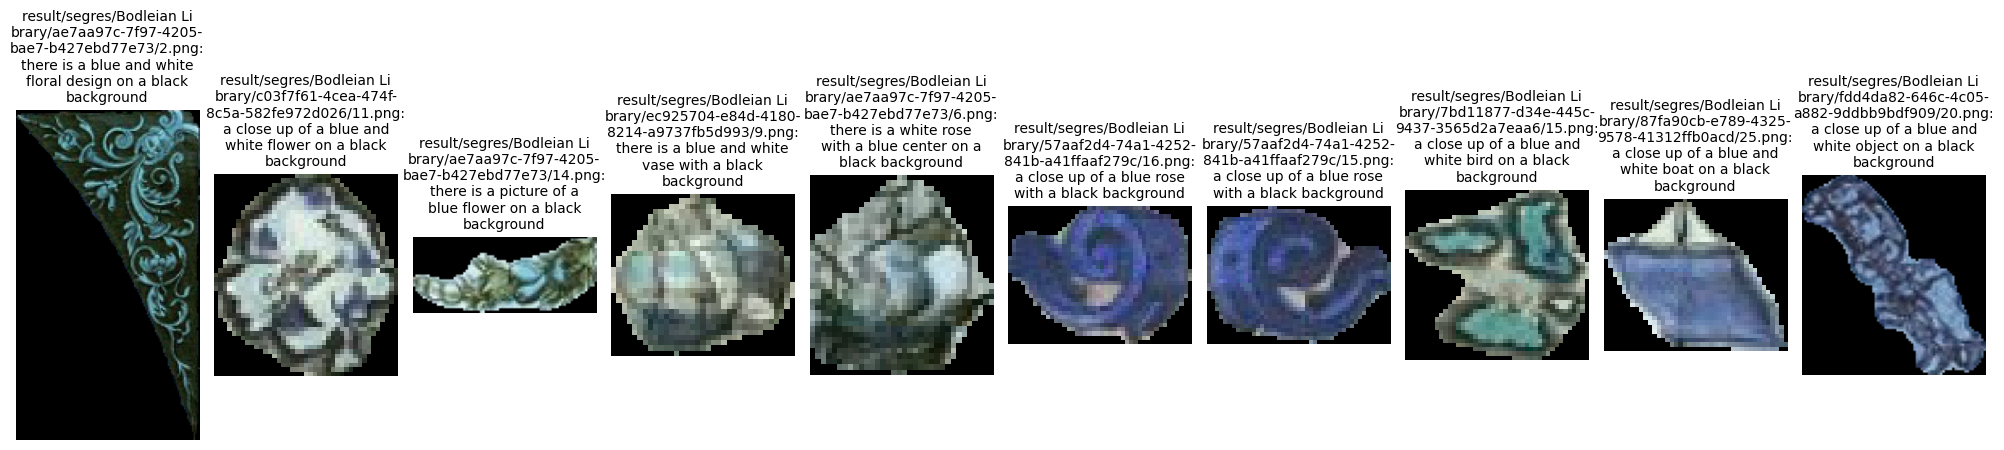

In [5]:


# select_file_path = input('Please input the file path you want to choose: ')
# select_file_path = 'result/segres/Bodleian Library/209ca258-70bb-4755-bfd0-1570eb48c493/3.png'
select_file_path = 'result/segres/Bodleian Library/ae7aa97c-7f97-4205-bae7-b427ebd77e73/2.png' 

# give a number to the embedding
id_info_dict = {info['id']: {**info, 'path':key} for key,info in info_dict.items()}
id_info_list = [id_info_dict[key] for key in sorted(id_info_dict)]
# id_info_dict

#generate the matrix
image_embeddings = torch.stack( [info['image_embedding'] for info in id_info_list])
text_embeddings = torch.stack( [info['text_embedding'] for info in id_info_list])

#calculate the similarity
similarity_image_text = torch.softmax(image_embeddings @ text_embeddings.T, dim=-1)
similarity_text_image = torch.softmax(text_embeddings @ image_embeddings.T, dim=-1)
similarity_image_image = torch.softmax(image_embeddings @ image_embeddings.T, dim=-1)
similarity_text_text = torch.softmax(text_embeddings @ text_embeddings.T, dim=-1)
#calculate using cosine
from sklearn.metrics.pairwise import cosine_similarity
similarity_text_text_cos = cosine_similarity(text_embeddings.cpu(), text_embeddings.cpu())

print(similarity_image_image[0].shape)

indice_selected_file = info_dict[select_file_path]['id']
mask_indices = torch.ones(similarity_image_image.size(0), dtype=torch.bool)
mask_indices[indice_selected_file] = False
k=10
_, top_indices_image_text = torch.topk(similarity_image_text[indice_selected_file], 10)
_, top_indices_text_image = torch.topk(similarity_text_image[indice_selected_file], 10)
_, top_indices_image_image = torch.topk(similarity_image_image[indice_selected_file], 10)
_, top_indices_text_text = torch.topk(similarity_text_text[indice_selected_file], 10)
_, top_indices_text_text_cos = torch.topk(torch.tensor(similarity_text_text_cos[indice_selected_file]), 10)

# print(top_indices_image_image)


#print results
print('now picture selected: ')
img = mpimg.imread(select_file_path)
plt.imshow(img)
plt.axis('off')
plt.show()

print('now picture text:')
print(id_info_dict[indice_selected_file]['text'])


def print_result(img_paths):
    # 创建一个 1 行 10 列的图形布局
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))  # 设置合适的宽高

    # 逐个读取图片并显示
    for i, img_path in enumerate(img_paths):
        img = mpimg.imread(img_path)  # 读取图片
        axes[i].imshow(img)           # 显示图片
        #similar image text
        # 使用 textwrap.wrap 将文字分行
        wrapped_caption = "\n".join(textwrap.wrap(f"{str(img_path)}: {info_dict[img_path]['text']}", 25))

        # 设置标题，限制字体大小
        axes[i].set_title(wrapped_caption, fontsize=10)  # 设置小字体大小
        axes[i].axis('off')           # 关闭坐标轴

    plt.tight_layout()
    plt.show()



#get most similar text
print('most similar image to images:')
image_paths_image_image = [info['path'] for info in np.array(id_info_list)[top_indices_image_image.cpu().numpy()]]
print_result(image_paths_image_image)

print('most similar image to text: ')
image_paths_image_text = [info['path'] for info in np.array(id_info_list)[top_indices_image_text.cpu().numpy()]]
print_result(image_paths_image_text)

print('most similar text to image: ')
image_paths_image_text = [info['path'] for info in np.array(id_info_list)[top_indices_text_image.cpu().numpy()]]
print_result(image_paths_image_text)

print('most similar text to text: ')
image_paths_image_text = [info['path'] for info in np.array(id_info_list)[top_indices_text_text.cpu().numpy()]]
print_result(image_paths_image_text)



#using cosine
# #this one is a little bit useless
print('most similar text to text (using cosine): ')
image_paths_image_text = [info['path'] for info in np.array(id_info_list)[top_indices_text_text_cos.cpu().numpy()]]
print_result(image_paths_image_text)

## Embedding visualization

torch.Size([476, 1024])
(476, 2)


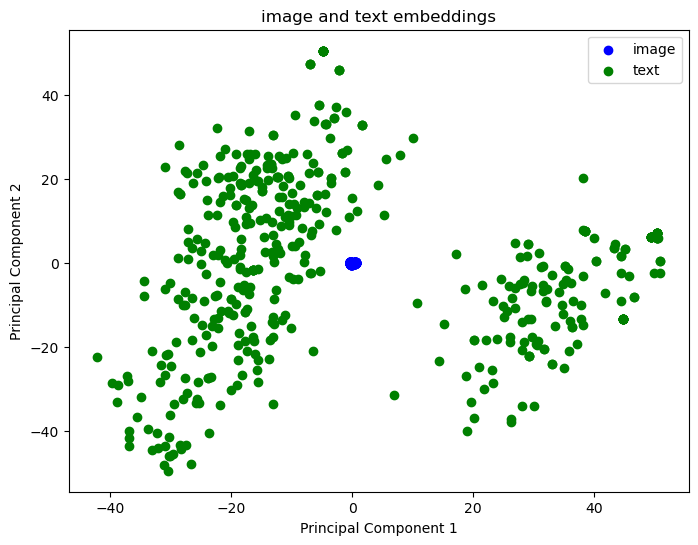

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


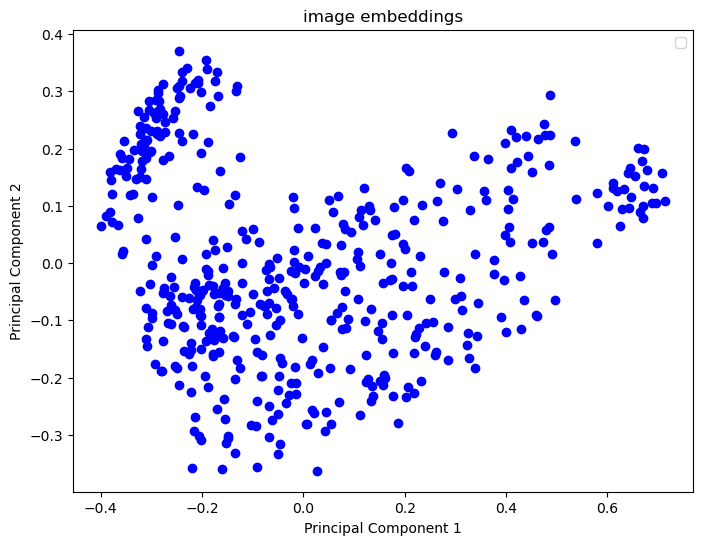

In [37]:

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt


#Using PCA

pca = PCA(n_components=2)
print(image_embeddings.shape)
pca_result_image = pca.fit_transform(image_embeddings.cpu())
pca_result_text = pca.fit_transform(text_embeddings.cpu())
print(pca_result_image.shape)


#using t-sne
tsne = TSNE(2)
tsne_result_image = tsne.fit_transform(image_embeddings.cpu())
tsne_result_text = tsne.fit_transform(text_embeddings.cpu())

plt.figure(figsize=(8, 6))
for ls, color,lb in zip([pca_result_image, pca_result_text], ['b', 'g'],['image', 'text']):
    plt.scatter(ls[:,0], ls[:,1], label=lb, color=color)
# plt.scatter(pca_result_image[:,0], pca_result_image[:,1])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('image and text embeddings')
plt.legend()
plt.show()


#single image
plt.figure(figsize=(8, 6))
plt.scatter(pca_result_image[:,0], pca_result_image[:,1], color='b')
# plt.scatter(pca_result_image[:,0], pca_result_image[:,1])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('image embeddings')
plt.legend()
plt.show()

# Clustering

聚类标签: [1 3 4 4 3 1 3 3 3 3 3 3 4 3 4 4 1 4 4 3 0 3 4 3 3 0 0 3 2 0 3 0 0 2 4 0 3
 3 2 3 4 0 4 4 1 0 2 2 2 2 0 1 3 4 3 0 2 2 3 2 2 3 2 3 2 3 3 4 1 4 2 2 3 3
 4 4 2 3 2 0 2 3 2 0 4 2 0 3 0 5 2 4 0 0 3 0 4 0 0 3 3 2 2 1 4 0 2 1 4 1 2
 3 1 1 2 1 3 1 1 3 1 1 2 0 1 4 3 1 1 2 3 0 4 2 0 2 3 0 2 0 2 4 1 3 1 2 3 1
 1 3 4 1 1 1 1 1 1 2 1 1 2 2 1 1 4 1 1 3 4 0 2 1 0 1 2 2 3 1 4 2 2 2 0 0 4
 2 4 3 0 2 0 0 3 2 4 3 3 1 2 0 2 2 4 3 4 3 4 2 2 2 0 3 0 2 0 1 3 2 2 2 3 1
 2 2 1 0 2 3 2 3 4 3 2 1 2 0 3 3 3 1 3 4 2 4 2 3 2 3 1 2 2 1 2 3 3 0 3 2 2
 3 2 0 4 2 3 0 0 4 4 3 1 5 0 3 0 2 4 4 0 4 5 0 4 2 0 4 2 0 4 0 3 0 2 5 3 2
 0 0 3 0 0 0 0 3 4 2 2 0 3 4 0 2 3 5 0 3 2 3 2 0 3 1 1 1 1 1 1 1 1 1 1 3 1
 1 1 1 3 3 1 1 1 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 2 1 1 3 1 3 1 1 1 5 2 5 0
 2 3 5 4 0 0 0 0 5 0 5 4 2 0 2 2 5 2 0 0 3 3 3 0 5 4 3 3 3 2 0 5 1 1 1 1 4
 1 4 1 4 4 1 1 3 4 1 2 1 1 4 2 1 2 3 1 4 4 1 4 0 4 1 3 3 1 4 1 1 1 3 4 3 4
 4 0 0 2 4 3 2 2 2 3 0 5 3 3 2 2 4 4 4 4 3 3 4 4 3 0 0 2 4 3 3 5]
[20, 25, 26, 29, 31, 32, 35,

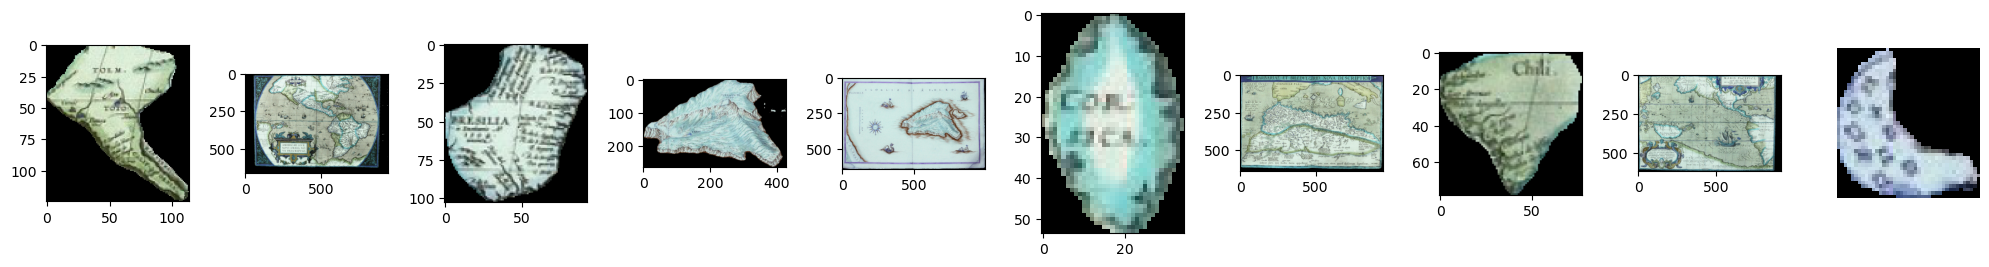

[0, 5, 16, 44, 51, 68, 103, 107, 109, 112, 113, 115, 117, 118, 120, 121, 124, 127, 128, 142, 144, 147, 148, 151, 152, 153, 154, 155, 156, 158, 159, 162, 163, 165, 166, 171, 173, 177, 197, 215, 221, 224, 233, 239, 248, 251, 270, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 332, 333, 334, 335, 338, 339, 340, 342, 343, 344, 345, 346, 348, 349, 351, 352, 353, 355, 356, 358, 359, 361, 363, 364, 365, 402, 403, 404, 405, 407, 409, 412, 413, 416, 418, 419, 422, 425, 428, 432, 435, 437, 438, 439]


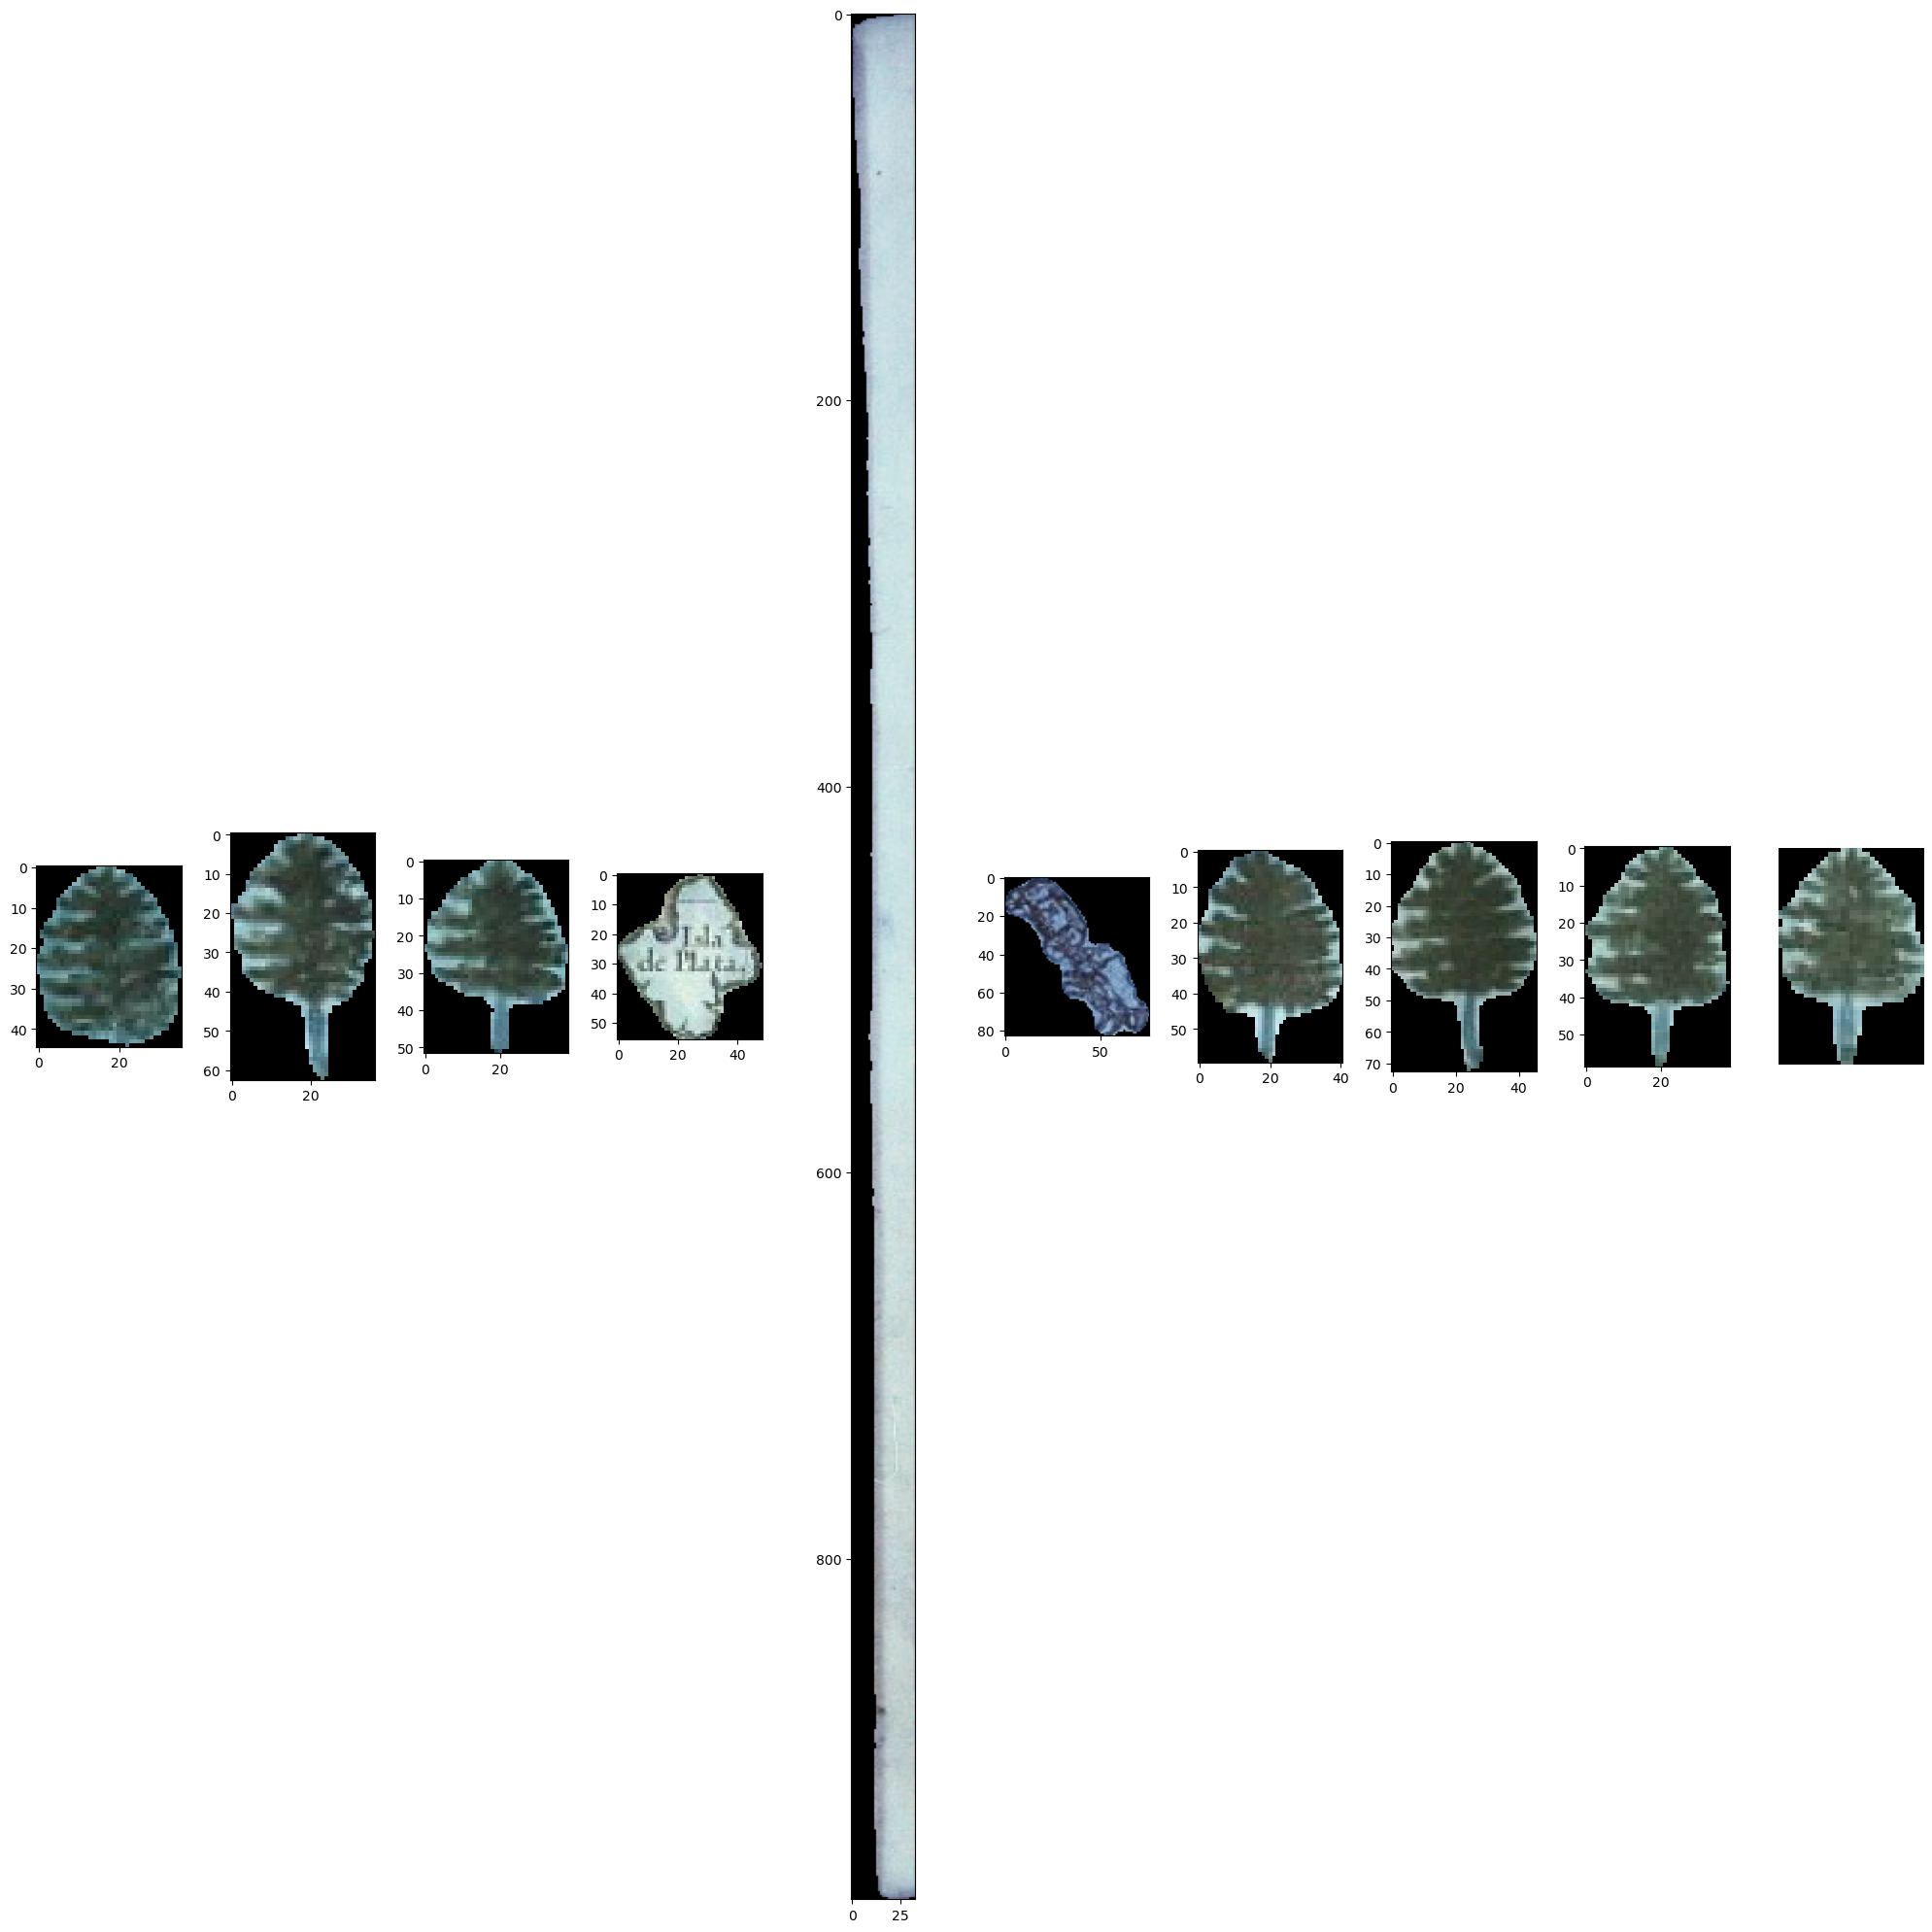

[28, 33, 38, 46, 47, 48, 49, 56, 57, 59, 60, 62, 64, 70, 71, 76, 78, 80, 82, 85, 90, 101, 102, 106, 110, 114, 122, 129, 133, 135, 138, 140, 145, 157, 160, 161, 170, 174, 175, 179, 180, 181, 185, 189, 193, 198, 200, 201, 207, 208, 209, 213, 217, 218, 219, 222, 223, 226, 228, 232, 234, 242, 244, 246, 249, 250, 252, 257, 258, 260, 263, 275, 283, 286, 292, 295, 305, 306, 311, 316, 318, 357, 367, 370, 382, 384, 385, 387, 399, 417, 421, 423, 447, 450, 451, 452, 458, 459, 471]


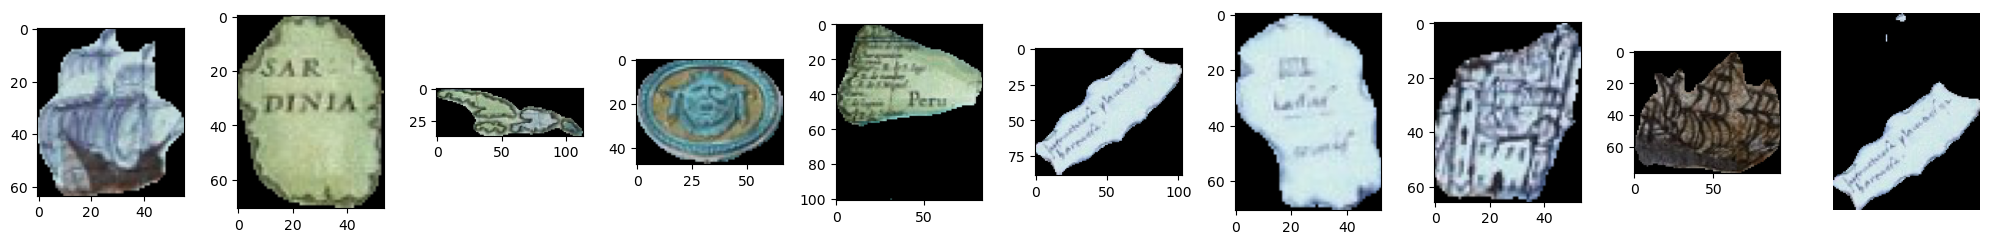

[1, 4, 6, 7, 8, 9, 10, 11, 13, 19, 21, 23, 24, 27, 30, 36, 37, 39, 52, 54, 58, 61, 63, 65, 66, 72, 73, 77, 81, 87, 94, 99, 100, 111, 116, 119, 126, 130, 136, 143, 146, 149, 167, 176, 187, 192, 195, 196, 203, 205, 211, 216, 220, 227, 229, 231, 236, 237, 238, 240, 245, 247, 253, 254, 256, 259, 264, 269, 273, 290, 294, 298, 303, 308, 312, 315, 317, 320, 331, 336, 337, 341, 347, 350, 354, 360, 362, 371, 390, 391, 392, 396, 397, 398, 414, 424, 433, 434, 440, 442, 449, 453, 456, 457, 464, 465, 468, 473, 474]


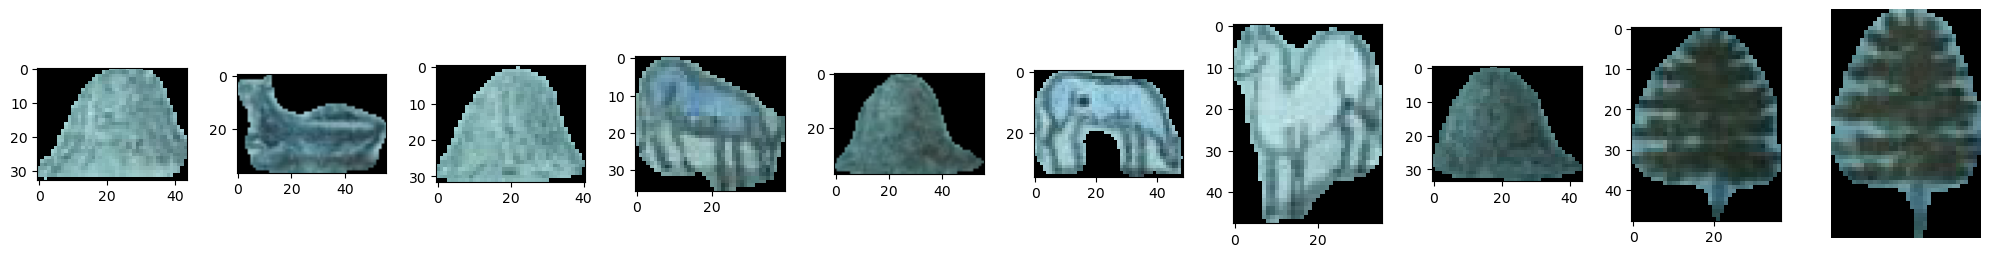

[2, 3, 12, 14, 15, 17, 18, 22, 34, 40, 42, 43, 53, 67, 69, 74, 75, 84, 91, 96, 104, 108, 125, 132, 141, 150, 164, 168, 178, 184, 186, 194, 202, 204, 206, 230, 241, 243, 262, 267, 268, 276, 277, 279, 282, 285, 288, 304, 309, 373, 381, 395, 406, 408, 410, 411, 415, 420, 426, 427, 429, 431, 436, 441, 443, 444, 448, 460, 461, 462, 463, 466, 467, 472]


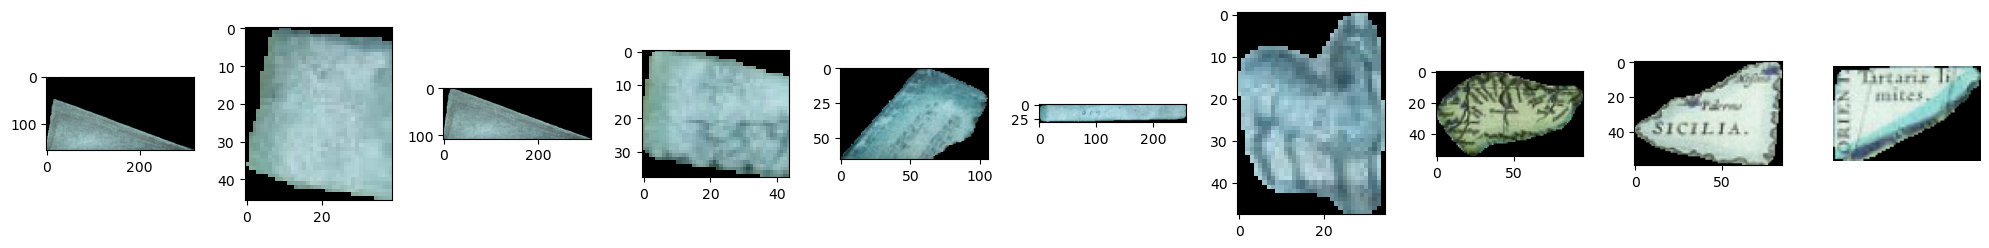

[89, 271, 280, 293, 313, 366, 368, 372, 378, 380, 386, 394, 401, 455, 475]


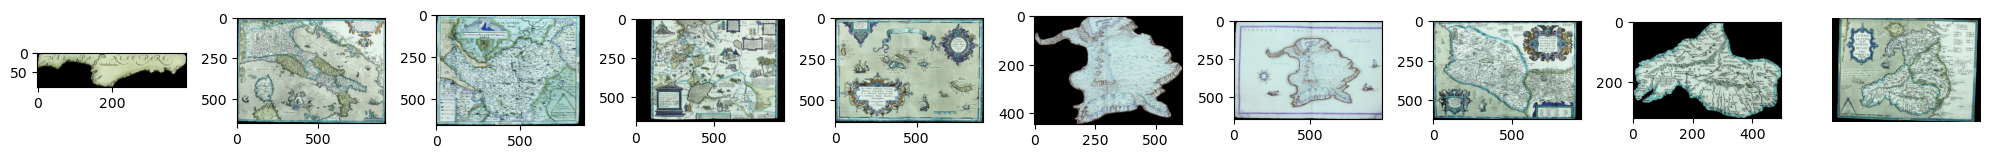

簇中心: [[ 0.00879643  0.01829866 -0.00631205 ... -0.0113351  -0.02209225
   0.02259556]
 [-0.00841025 -0.00348809 -0.02405295 ... -0.04971233  0.02613921
  -0.01622844]
 [ 0.00100783  0.0060475  -0.00896039 ... -0.02410032  0.01001229
  -0.00462731]
 [-0.00360463 -0.01864794 -0.0242914  ... -0.04436182  0.02979616
  -0.01566008]
 [-0.00381726 -0.00317136 -0.01969781 ... -0.02653762  0.01580921
  -0.01350444]
 [ 0.0129773   0.00961516 -0.01538829 ...  0.01101374 -0.05603471
   0.0344162 ]]


In [33]:
#Using K-means to try
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 设置K值
k = 6

# 创建KMeans模型
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)

# 训练模型
kmeans.fit(image_embeddings.cpu())

# 获取聚类标签
labels = kmeans.labels_
print("聚类标签:", labels)

# add to dict 
# for key, label in zip(id_info_dict, labels):
#     id_info_dict[key]['cluster_label'] = label


def print_result_image(img_paths):
    # 创建一个 1 行 10 列的图形布局
    fig, axes = plt.subplots(1, len(img_paths), figsize=(20, 20))  # 设置合适的宽高

    # 逐个读取图片并显示
    for i, img_path in enumerate(img_paths):
        img = mpimg.imread(img_path)  # 读取图片
        axes[i].imshow(img)           # 显示图片
        plt.axis('off')  #
    plt.tight_layout()
    plt.show()




#get index
for i in range(k):
    now_index = list(np.where(labels == i)[0])
    print(now_index)
    img_paths = [info['path'] for info in np.array(id_info_list)[now_index]]
    print_result_image(img_paths[:10])



# 获取簇中心
centers = kmeans.cluster_centers_
print("簇中心:", centers)

# 可视化结果
# plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
# plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', label='Centroids')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.legend()
# plt.title('K-Means Clustering')
# plt.show()


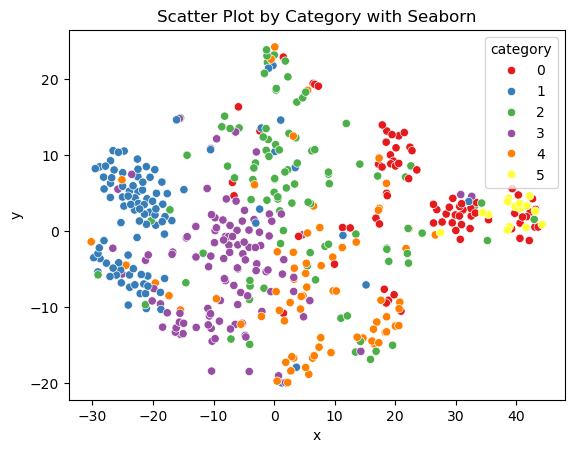

In [38]:
import seaborn as sns
import pandas as pd

# 创建一个 DataFrame
# data = pd.DataFrame({
#     'x': pca_result_image[:,0],
#     'y': pca_result_image[:,1],
#     'category': labels
# })


data = pd.DataFrame({
    'x': tsne_result_image[:,0],
    'y': tsne_result_image[:,1],
    'category': labels
})

# 使用 seaborn 绘制散点图
sns.scatterplot(data=data, x='x', y='y', hue='category', palette='Set1')

# 添加标题
plt.title("KMeans result")
plt.show()
